## <div align="center"> UAS IS411 DATA MODELLING </div>
### <div align="center"> UAS: Final Project </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

---

### Hasil kerja

#### Business Understanding

Pada penelitian ini, data yang diuji adalah hasil analisis anggur yang ditanam di wilayah Italia, namun berasal dari tiga kultivar yang berbeda. Terdapat 178 sampel data pada dataset dengan 13 parameter di tabel dan semua data bertipe numerik. Analisis ini bertujuan untuk menemukan model yang dapat memprediksi anggur dengan 13 parameter yang sudah diukur. Selain itu, analisis ini bertujuan untuk mengetahui perbedaan utama dari tiga kelas yang ada pada dataset. Analisis akan dilakukan dengan dua algoritma, yaitu algoritma KNN dan algoritma Random Forest Classifier 

#### Data Understanding

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('wine.csv')
wine.head()

,customer_seg,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.tail()

,customer_seg,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_seg                   178 non-null    int64  
 1   Alcohol                        178 non-null    float64
 2   Malic acid                     178 non-null    float64
 3   Ash                            178 non-null    float64
 4    Alcalinity of ash             178 non-null    float64
 5    Magnesium                     178 non-null    int64  
 6   Total phenols                  178 non-null    float64
 7    Flavanoids                    178 non-null    float64
 8    Nonflavanoid phenols          178 non-null    float64
 9    Proanthocyanins               178 non-null    float64
 10   Color intensity               178 non-null    float64
 11   Hue                           178 non-null    float64
 12   OD280/OD315 of diluted wines  178 non-null    flo

In [6]:
wine.shape

(178, 14)

#### Data Visualization

In [7]:
wine['customer_seg'].value_counts()

2    71
1    59
3    48
Name: customer_seg, dtype: int64

Visualisasi jumlah data pada setiap kelas dengan bar chart

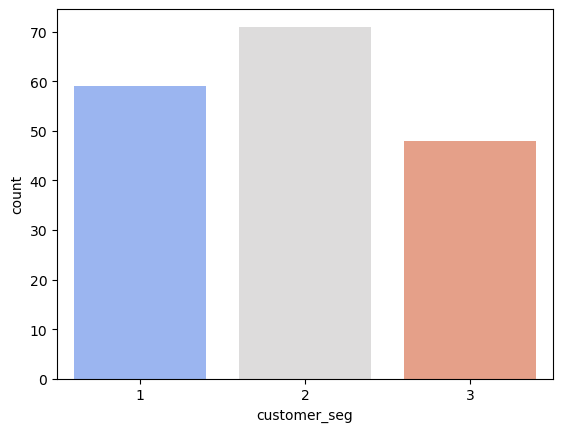

In [8]:
b=sns.countplot(x='customer_seg', data = wine, palette='coolwarm')
plt.show()

Visualisas korelasi antar variabel dengan heatmap

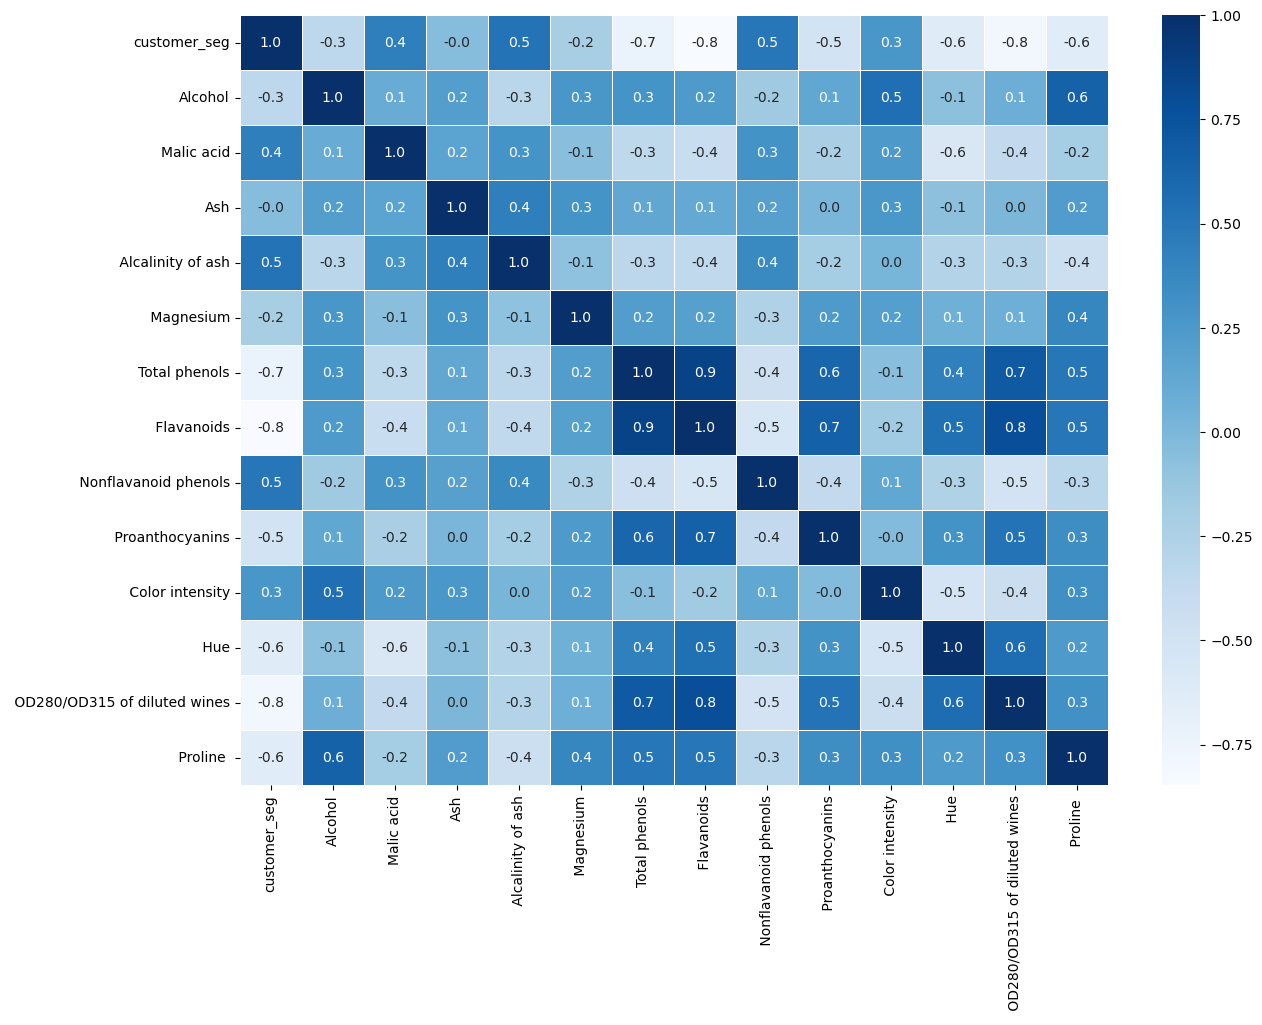

In [9]:
plt.figure(figsize = (14,10))
sns.heatmap(wine.corr(), annot = True, fmt = ".1f", linewidths = .7, cmap="Blues")
plt.show()

Visualisasi distribusi data pada kolom 'Alcohol' pada setiap kelas berdasarkan 'customer_seg'

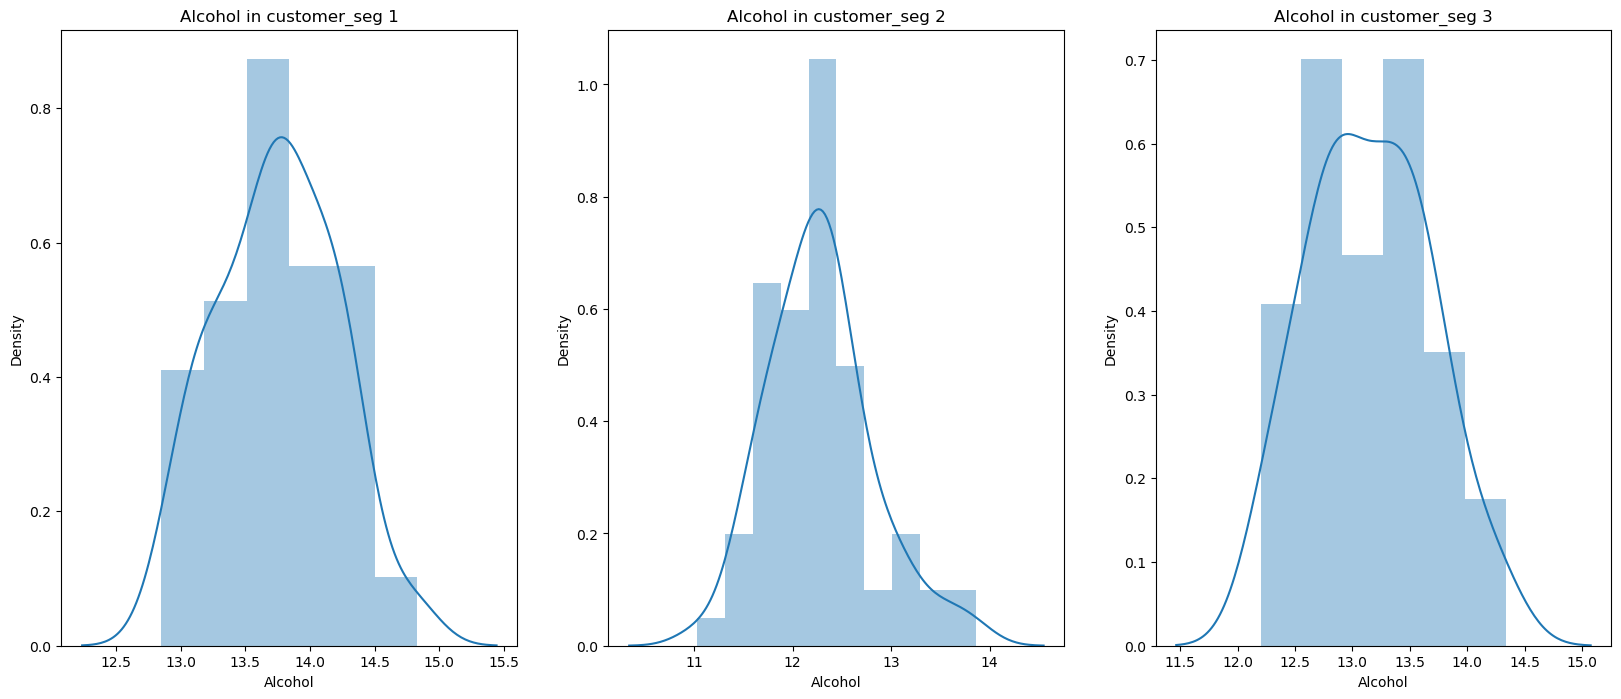

In [10]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(wine[wine['customer_seg']==1].Alcohol,ax=ax[0])
ax[0].set_title('Alcohol in customer_seg 1')
sns.distplot(wine[wine['customer_seg']==2].Alcohol,ax=ax[1])
ax[1].set_title('Alcohol in customer_seg 2')
sns.distplot(wine[wine['customer_seg']==3].Alcohol,ax=ax[2])
ax[2].set_title('Alcohol in customer_seg 3')
plt.show()

#### Data Preparation

In [11]:
X = wine.iloc[:, 1:13].values
y = wine.iloc[:, 0].values

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [13]:
#Checking missing value
print("Missing value for each feature: ")
print(wine.isnull().sum())
print("\nTotal missing value: ")
print(wine.isnull().sum().sum())

Missing value for each feature: 
customer_seg                     0
Alcohol                          0
Malic acid                       0
Ash                              0
 Alcalinity of ash               0
 Magnesium                       0
Total phenols                    0
 Flavanoids                      0
 Nonflavanoid phenols            0
 Proanthocyanins                 0
 Color intensity                 0
 Hue                             0
 OD280/OD315 of diluted wines    0
 Proline                         0
dtype: int64

Total missing value: 
0


Menyamakan jumlah dataset pada setiap kelas menjadi sama-sama berjumlah 49

In [14]:
# SMOTE     
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=0)
print('Original dataset shape %s' % Counter(y))
print('Original ytrain dataset shape %s' % Counter(y_train))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Resampled ytrain dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({2: 71, 1: 59, 3: 48})
Original ytrain dataset shape Counter({2: 49, 1: 40, 3: 35})
Resampled ytrain dataset shape Counter({1: 49, 2: 49, 3: 49})


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_smote)
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

#### Modelling

#### K-Nearest Neighbors Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=1)

In [17]:
print('Parameters currently in use:\n')
print(classifier.get_params())

Parameters currently in use:

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


#### K-NN dan GridSearchCV

Keterangan hyperparameters untuk KNN:

a. n_neighbors: Parameter n_neighbors adalah parameter yang menunjukkan jumlah tetangga yang akan menjadi pertimbangan dalam pembentukan kelas.

In [18]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [19]:
print(grid_search.best_params_)

{'n_neighbors': 3}


#### Evaluation

#### Akurasi data training K-Nearest Neighbors Classifier

In [20]:
print(grid_search.best_score_)

0.9395238095238095


In [36]:
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning is: {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is: 93.95%


#### Akurasi data testing K-Nearest Neighbors Classifier

In [37]:
y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy for our testing dataset with tuning is: {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is: 94.44%


In [38]:
print("Misclassification error rate:", round(np.mean(y_pred != y_test), 3))

Misclassification error rate: 0.056


Classification Report dan Confusion Matrix

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


Confusion Matrix dengan Heatmap

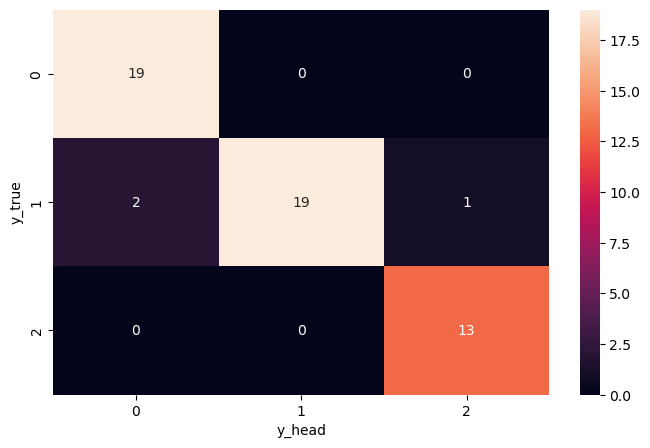

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [41]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_smote, y_train_smote)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

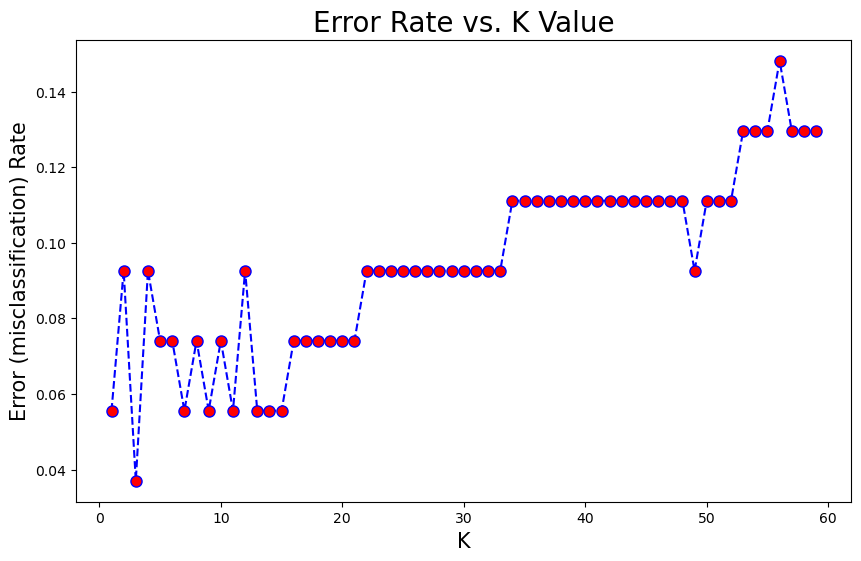

In [43]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 60), error_rate, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize = 8)
plt.title("Error Rate vs. K Value", fontsize = 20)
plt.xlabel("K", fontsize = 15)
plt.ylabel("Error (misclassification) Rate", fontsize = 15)

Dari hasil visualisasi tersebut, jika ingin mendapatkan prediksi dengan tingkat kesalahan 0 atau sangat kecil pada dataset ini, nilai K yang dapat dicoba adalah nilai K seperti 3, yang nilainya di bawah sumbu y, tepatnya dengan nilai dibawah 0.04. Model prediksi dataset pada pengujian kali ini menggunakan nilai K yaitu 3, artinya nilai tingkat kesalahannya kecil. Hal ini juga sudah sesuai dengan hasil parameter dengan Grid Search CV yang menunjukkan nilai 3.

#### Random Forest Classifier

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10, max_features = 3, n_estimators = 100)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, max_features=3)

In [23]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Random Forest Classifier dan GridSearchCV

Keterangan hyperparameters untuk Random Forest Classifier:

a. n_estimators = jumlah pohonnya pada algoritma Random Forest

b. max_features = jumlah maksimum fitur yang dipertimbangkan untuk memisahkan node

c. max_depth = jumlah maksimal level di setiap pohon keputusan. Umumnya, semakin dalam pohon keputusan, maka akan semakin banyak split atau pemecahannya, jadi max_depth bertujuan untuk membatasi pemecahan agar tidak terlalu banyak

d. min_samples_split = jumlah min titik data yang ditempatkan di node sebelum node dipisah

e. min_samples_leaf = jumlah min titik data yang diperbolehkan dalam simpul daun

f. bootstrap = metode pengambilan sampel titik data (dengan atau tanpa penggantian)

In [24]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 5, stop = 25, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 5, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [5, 7, 9, 11, 13, 16, 18, 20, 22, 25], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [25]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [26]:
rf_grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_features=3),
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 7, 9, 11, 13, 16, 18, 20, 22, 25]},
             scoring='accuracy')

In [27]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 25}

#### Evaluation

#### Akurasi data training Random Forest

In [28]:
print(rf_grid.best_score_)

0.9933333333333334


In [29]:
accuracy = rf_grid.best_score_ * 100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 99.33%


#### Akurasi data testing Random Forest

In [30]:
y_predict = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_predict)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 96.30%


In [31]:
print("Misclassification error rate:", round(np.mean(y_predict != y_test), 3))

Misclassification error rate: 0.037


Classification Report dan Confusion Matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.91      0.95        22
           3       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

[[19  0  0]
 [ 1 20  1]
 [ 0  0 13]]


Confusion Matrix dengan Heatmap

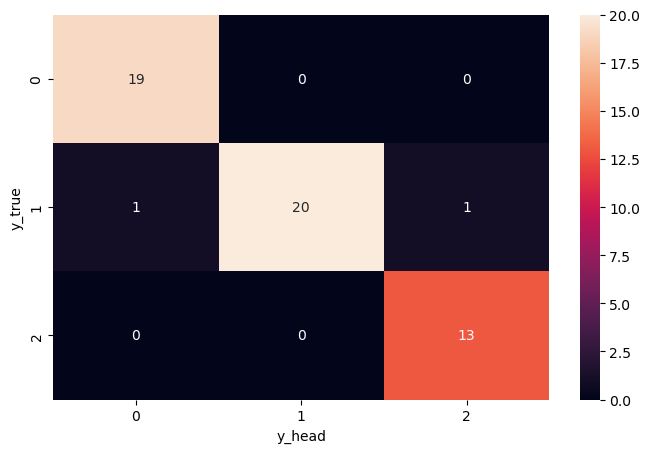

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

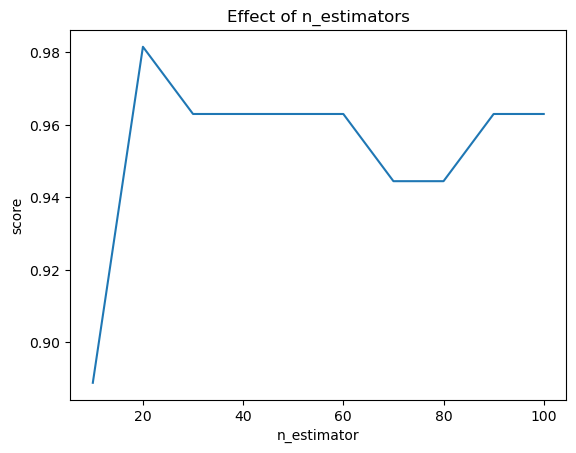

In [35]:
estimators = np.arange(10, 110, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train_smote, y_train_smote)
    scores.append(rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

Dari hasil visualisasi ini, n_estimators terbaik adalah 25. Jika dilihat pada grafik, n_estimators dengan 25 memiliki skor sebesar 0,98. Oleh karena itu, hasil akurasi yang pada data training dan data testing tentu wajar jika mendapatkan nilai yang tinggi.

#### Deployment

Tahap Deployment adalah tahap yang melibatkan penerapan model yang telah dikembangkan ke lingkungan yang sesuai untuk digunakan dalam konteks bisnis atau keputusan. Selain itu juga akan dilakukan penyesuaian pada model yang telah dibuat sehingga dapat menghasilkan suatu hasil yang sesuai dengan target awal dari CRISP-DM ini. 